### Authorize Google Sheets Access and Write Data Frames into Sheets

#### First let's connect our notebook to Google Sheets. To do this, you will need to enable some API's and create a secret client JSON file in order to authorize Sheets access. Make sure to implement all steps explained in here: https://gspread.readthedocs.io/en/latest/oauth2.html then you can just use these codes below:

In [178]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

links = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name('ENTER_YOUR_JSON_FILE_NAME_HERE.json', links)

gc = gspread.authorize(credentials)


In [179]:
sh = gc.create('MyCoolSpreadsheet')

wks = gc.open("MyCoolSpreadsheet").sheet1

# check colab documents here for more examples --> https://colab.research.google.com/notebooks/io.ipynb

In [130]:
import pandas as pd

In [131]:
## Creating a formula to send data frames into sheets : https://www.danielecook.com/from-pandas-to-google-sheets/

def iter_pd(df):
    for val in list(df.columns):
        yield val
    for row in df.values:
        for val in list(row):
            if pd.isna(val):
                yield ""
            else:
                yield val

def pandas_to_sheets(pandas_df, sheet, clear = True):
    # Updates all values in a workbook to match a pandas dataframe
    if clear:
        sheet.clear()
    (row, col) = pandas_df.shape
    cells = sheet.range("A1:{}".format(gspread.utils.rowcol_to_a1(row + 1, col)))
    for cell, val in zip(cells, iter_pd(df)):
        cell.value = val
    sheet.update_cells(cells)

In [5]:
# let's read a csv file and write it into Google Sheets

df = pd.read_csv("train.csv")
pandas_to_sheets(df, wks)

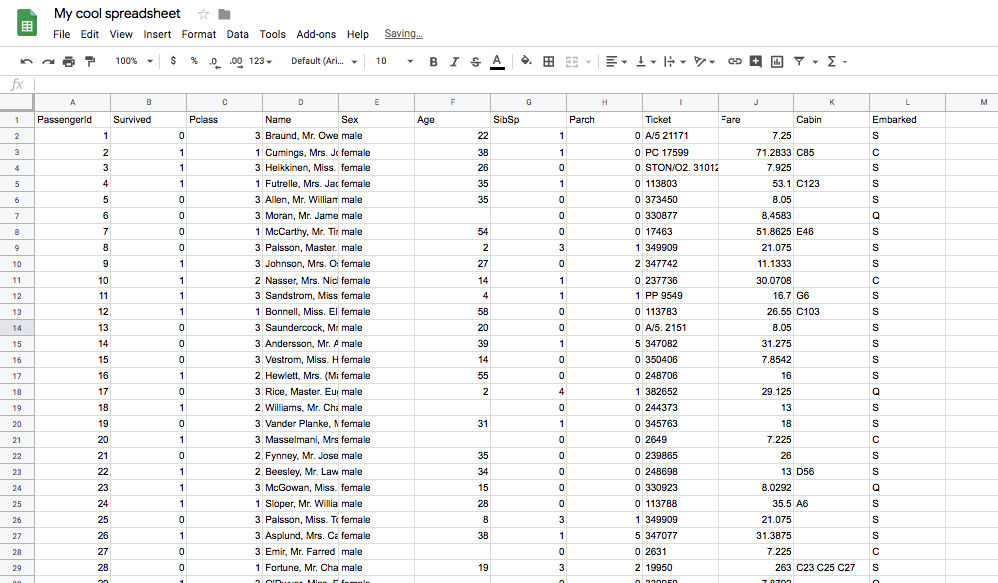

### That's all for Google Sheets connections. Now I'll play with pytrends library to do more cool stuff ;)

In [232]:
import pytrends
from pytrends.request import TrendReq
import pandas as pd
import time
import datetime
from datetime import datetime, date, time

In [233]:
pytrend = TrendReq()

In [289]:
pytrend.build_payload(kw_list=['foundation'], geo = 'US', timeframe = 'today 3-m', cat = 44)
related_queries_dict = pytrend.related_queries()
print(related_queries_dict)

{'foundation': {'top':                         query  value
0             best foundation    100
1           makeup foundation     62
2           powder foundation     42
3            foundation brush     24
4       maybelline foundation     23
5                  maybelline     23
6             ulta foundation     21
7          sephora foundation     19
8           liquid foundation     19
9            cream foundation     19
10       drugstore foundation     18
11             mac foundation     18
12            face foundation     17
13   full coverage foundation     16
14           foundation stick     16
15            nars foundation     15
16    foundation for dry skin     15
17   foundation for oily skin     15
18     best foundation makeup     15
19  best drugstore foundation     14
20    estee lauder foundation     14
21          loreal foundation     13
22                  covergirl     12
23       covergirl foundation     12
24           foundation match     12, 'rising':     

In [ ]:
# for example, lets enter some keywords here, select a time range and country
pytrend.build_payload(kw_list=['tea', 'coffee', 'coke', 'milk', 'water'], timeframe='today 12-m', geo = 'US', cat =67)

In [238]:
#to get interest over time score, you'll need pytrend.interest_over_time() function. 
#For more functions, check this: https://github.com/GeneralMills/pytrends
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())

            tea  coffee  coke  milk  water isPartial
date                                                
2019-02-03   31      29     4    22     74     False
2019-02-10   31      29     4    22     73     False
2019-02-17   33      28     4    21     74     False
2019-02-24   31      27     4    21     74     False
2019-03-03   32      28     4    22     72     False


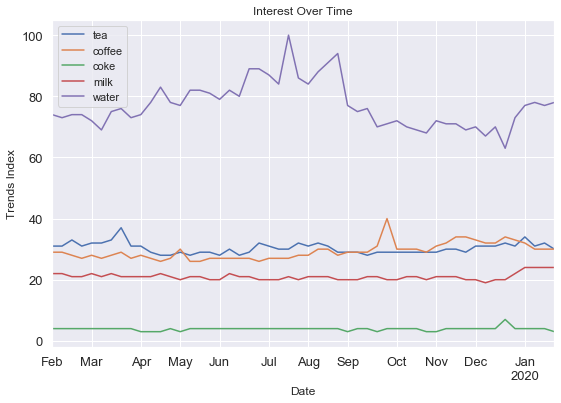

In [240]:
# Let's draw
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
ax = interest_over_time_df.plot.line(figsize = (9,6), title = "Interest Over Time")
ax.set_xlabel('Date')
ax.set_ylabel('Trends Index')
ax.tick_params(axis='both', which='major', labelsize=13)

### if you use pytrend.suggestions function, it'll return with 'type' section which gives you the category of suggested keyword.
you can use it to tag your keywords and group them separately. Voila!

In [258]:
print(pytrend.suggestions(keyword='places to travel'), '\n')
print(pytrend.suggestions(keyword='amazon'), '\n')
print(pytrend.suggestions(keyword='cats'), '\n')
print(pytrend.suggestions(keyword='macbook pro'), '\n')
print(pytrend.suggestions(keyword='beer'), '\n')
print(pytrend.suggestions(keyword='ikea'), '\n')

[{'mid': '/m/01hjj_', 'title': 'Lodging', 'type': 'Topic'}, {'mid': '/m/0n3zgcz', 'title': 'trivago N.V.', 'type': 'Topic'}, {'mid': '/g/120yrv6h', 'title': 'Tourism', 'type': 'Topic'}, {'mid': '/g/11hbpdnwpl', 'title': 'Away', 'type': 'Luggage'}, {'mid': '/m/01_5hj', 'title': 'Caravan', 'type': 'Towed trailer'}] 

[{'mid': '/m/0mgkg', 'title': 'Amazon.com', 'type': 'E-commerce company'}, {'mid': '/m/0cx4p', 'title': 'Amazon Rainforest', 'type': 'Rainforest in Brazil'}, {'mid': '/g/11b6x7cx6n', 'title': 'Amazon Prime', 'type': 'Topic'}, {'mid': '/m/0gvlgh', 'title': 'Amazon Prime Video', 'type': 'Television channel'}, {'mid': '/m/0sd7', 'title': 'Amazon River', 'type': 'River in South America'}] 

[{'mid': '/m/01yrx', 'title': 'Cat', 'type': 'Animal'}, {'mid': '/m/01fh1_', 'title': 'Cats', 'type': 'Musical by T. S. Eliot'}, {'mid': '/m/0307l', 'title': 'Felidae', 'type': 'Animal'}, {'mid': '/m/03dkx', 'title': 'Geelong Football Club', 'type': 'Football club'}, {'mid': '/m/0ht80', 'titl

In [138]:
searches = ['Search Engine Land', 'amazon', 'Macbook pro', 'beer', 'cats', 'ikea']
brands = []
for i in searches:
        suggest = pytrend.suggestions(keyword=i) 
        brands.append([suggest[0]['mid'], suggest[0]['title'], suggest[0]['type']])

print(brands)

[['/m/0j1rt7p', 'Search Engine Land', 'Blog'], ['/m/0mgkg', 'Amazon.com', 'E-commerce company'], ['/m/09tzfp', 'Apple MacBook Pro', 'Laptop'], ['/m/01599', 'Beer', 'Alcoholic drink'], ['/m/01yrx', 'Cat', 'Animal'], ['/m/03tb1', 'IKEA', 'Furniture retail company']]


In [139]:
pytrend = TrendReq()
import time
from random import randint
from time import sleep

In [331]:
dg=related_queries_dict.get('lipstick').get('rising')
dg.rename(columns={'value': 'Rising Percentage'}, inplace = True)
dg

,query,Rising Percentage
0,strawberry lipstick state of mind,3200
1,oryza lipstick,2300
2,ogee lipstick,350
3,louis vuitton lipstick case,300
4,doll 10 lipstick,250
5,givenchy black lipstick,200
6,mac lipstick set,200
7,mac sin lipstick,200
8,bellapierre lipstick,200
9,matte lipstick set,190


In [314]:
pytrend.build_payload(kw_list=['foundation', 'eyeliner', 'lipstick', 'concealer'], geo = 'US', timeframe = 'today 3-m', cat = 44)
related_queries_dict = pytrend.related_queries()
print(related_queries_dict)

{'foundation': {'top':                         query  value
0             best foundation    100
1           makeup foundation     60
2           powder foundation     41
3                   concealer     28
4            foundation brush     23
5                  maybelline     23
6       maybelline foundation     22
7             ulta foundation     21
8           liquid foundation     21
9              mac foundation     20
10         sephora foundation     19
11   full coverage foundation     19
12       drugstore foundation     18
13           cream foundation     17
14            nars foundation     17
15          loreal foundation     16
16    foundation for dry skin     16
17    estee lauder foundation     16
18           foundation stick     16
19  best drugstore foundation     15
20     best makeup foundation     15
21           foundation match     14
22   foundation for oily skin     13
23   best coverage foundation     13
24   bare minerals foundation     11, 'rising':     

In [316]:
df = pd.concat({k: pd.Series(v) for k, v in related_queries_dict.items()}).reset_index()
df.columns = list('xyz')
df.to_csv('rising2.csv')

In [313]:
df = pd.concat({k: pd.Series(v) for k, v in related_queries_dict.items()}).reset_index()
df.columns = list('xyz')
wks = gc.open("GoogleTrends").sheet2
pandas_to_sheets(df, wks)

In [293]:
# Now let's say you have some important keywords you should track closely and want to get their trends data 
# and blend it with search console 
searches = ['detox', 'water fasting', 'benefits of fasting', 'fasting benefits', 
            'acidic', 'water diet', 'ozone therapy', 'colon hydrotherapy', 'water fast', 
            'reflexology', 'balance', 'deep tissue massage', 'cryo', 'healthy body', 'what is detox', 
            'the truth about cancer', 'dieta', 'reverse diabetes', 'how to reverse diabetes', 'water cleanse', 
            'can you drink water when fasting', 'water fasting benefits', 'glycemic load', 'anti ageing', 
            'how to water fast', 'ozone treatment', 'healthy mind', 'can you reverse diabetes', 'anti aging', 
            'health benefits of fasting', 'hydrocolonic', 'shiatsu massage', 'seaweed wrap', 'shiatsu', 
            'can you get rid of diabetes', 'how to get rid of diabetes', 'healthy body healthy mind', 'colonic hydrotherapy', 
            'green detox', 'what is water fasting', '21 day water fast', 'benefits of water fasting', 'cellulite', 'ty bollinger', 
            'detox diet', 'detox program', 'anti aging treatments', 'ketogenic', 'glycemic index', 'water fasting weight loss', 
            'keto diet plan', 'acidic symptoms', 'alkaline diet', 'water fasting diet', 'laser therapy', 'anti cellulite massage', 
            'swedish massage', 'benefit of fasting', 'detox your body', 'colon therapy', 'lifeco', 'reversing diabetes', 'detoxing', 
            'truth about cancer', 'how to remove acidity from body', '21 day water fast results', 'colon cleanse', 'fasting health benefits', 
            'antiaging', 'aromatheraphy massage']

In [294]:
groupkeywords = list(zip(*[iter(searches)]*1))
groupkeywords = [list(x) for x in groupkeywords]

In [295]:
groupkeywords[0]

['detox']

In [296]:
dicti = {}
i = 1
for trending in groupkeywords:
    pytrend.build_payload(trending, timeframe = 'today 3-m', geo = 'GB', cat = 44)
    dicti[i] = pytrend.related_queries()
    i+=1
    

In [ ]:
result = pd.concat(dicti, axis=1)
result.columns = result.columns.droplevel(0)
result = result.drop('isPartial', axis = 1)

In [229]:
result

,detox,water fasting,benefits of fasting,fasting benefits,acidic,water diet,ozone therapy,colon hydrotherapy,water fast,reflexology,...,benefit of fasting,detox your body,colon therapy,lifeco,reversing diabetes,detoxing,truth about cancer,colon cleanse,fasting health benefits,antiaging
2019-10-31,35,30,27,31,48,25,0,99,15,50,...,0,0,0,54,0,33,0,40,0,0
2019-11-01,49,29,26,56,59,19,0,47,53,37,...,0,32,0,51,49,48,0,24,48,52
2019-11-02,36,32,27,46,45,34,35,48,46,64,...,0,32,89,0,99,32,0,29,48,0
2019-11-03,51,44,0,47,48,30,35,50,48,100,...,0,0,91,0,0,99,0,20,0,54
2019-11-04,42,81,38,64,58,28,66,45,54,70,...,0,30,0,0,0,30,45,27,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-25,61,44,27,93,69,30,0,48,62,81,...,0,0,90,0,0,44,0,54,0,0
2020-01-26,61,56,0,33,59,71,33,0,76,66,...,0,61,0,50,48,47,0,28,0,0
2020-01-27,60,46,24,48,62,58,31,44,46,62,...,77,29,0,48,0,58,44,53,0,0
2020-01-28,53,71,75,57,74,37,0,45,64,55,...,0,30,0,49,47,30,0,18,0,100


In [172]:
result.reset_index(level=0, inplace=True)
pd.melt(result, id_vars='date', value_vars=searches)

,date,variable,value
0,2019-10-31,detox,35
1,2019-11-01,detox,30
2,2019-11-02,detox,35
3,2019-11-03,detox,52
4,2019-11-04,detox,41
...,...,...,...
6295,2020-01-24,aromatheraphy massage,0
6296,2020-01-25,aromatheraphy massage,0
6297,2020-01-26,aromatheraphy massage,0
6298,2020-01-27,aromatheraphy massage,0


In [177]:
sh = gc.create('GoogleTrends')
wks = gc.open("GoogleTrends").sheet1
pandas_to_sheets(result, wks)

In [219]:
dx.rename(columns={'date': 'Date'}, inplace = True)
dx.rename(columns={'variable': 'Query'}, inplace = True)

In [209]:
dx = pd.read_excel('Trends.xlsx', sheet_name='trends')
dz = pd.read_excel('Trends.xlsx', sheet_name = 'console')

In [220]:
dx

,Date,Query,value
0,2019-10-30,detox,39
1,2019-10-31,detox,31
2,2019-11-01,detox,36
3,2019-11-02,detox,35
4,2019-11-03,detox,40
...,...,...,...
5910,2020-01-24,how to remove acidity from body,0
5911,2020-01-25,how to remove acidity from body,0
5912,2020-01-26,how to remove acidity from body,0
5913,2020-01-27,how to remove acidity from body,0


In [222]:
dm = pd.merge(dx, dz, on = ['Query', 'Date'])
dm

,Date,Query,value,Impressions,Clicks,Site CTR,Average Position
0,2019-10-30,detox,39,3067,19,0.006195,9.266710
1,2019-10-31,detox,31,2900,19,0.006552,9.528621
2,2019-11-01,detox,36,2074,14,0.006750,9.037126
3,2019-11-02,detox,35,1995,21,0.010526,9.104261
4,2019-11-03,detox,40,2518,34,0.013503,8.868546
...,...,...,...,...,...,...,...
4916,2020-01-23,how to remove acidity from body,0,71,0,0.000000,8.042254
4917,2020-01-24,how to remove acidity from body,0,63,2,0.031746,7.920635
4918,2020-01-25,how to remove acidity from body,0,61,3,0.049180,7.163934
4919,2020-01-27,how to remove acidity from body,0,57,3,0.052632,7.052632
